In [6]:
# Sales Data Analysis Project
# Dataset Source: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [9]:
# Load Dataset
try:
    df = pd.read_csv("Superstore.csv", encoding="windows-1252") # Specify Windows-1252 encoding to correctly handle special characters
    print("'Superstore.csv' loaded successfully.")

except FileNotFoundError:
    print("\n[ERROR] File not found!")
    print("Please ensure 'Superstore.csv' is in the current folder.")
    sys.exit()  # To prevent crash later


'Superstore.csv' loaded successfully.


In [10]:
# Data Cleaning
df["Sales"] = df["Sales"].fillna(df["Sales"].mean())

df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df = df.dropna(subset=["Order Date"])

df["Month"] = df["Order Date"].dt.month_name()


In [11]:
# Monthly Sales Analysis

monthly_sales = df.groupby("Month")["Sales"].sum()
calendar_months = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
monthly_sales = monthly_sales.reindex(calendar_months)

print("\n Monthly Sales Breakdown ")
print(monthly_sales)

#Category Wise Sales Analysis

category_sales = df.groupby("Category")["Sales"].sum()
print("\n Category Sales Breakdown ")
print(category_sales)


 Monthly Sales Breakdown 
Month
January       94924.8356
February      59751.2514
March        205005.4888
April        137762.1286
May          155028.8117
June         152718.6793
July         147238.0970
August       159044.0630
September    307649.9457
October      200322.9847
November     352461.0710
December     325293.5035
Name: Sales, dtype: float64

 Category Sales Breakdown 
Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


In [12]:
# Total and Average Sales Calculation
total_sales = df["Sales"].sum()
average_sales = df["Sales"].mean()

print("\nSales Summary")
print("Total Sales:", round(total_sales, 2))
print("Average Sales:", round(average_sales, 2))


Sales Summary
Total Sales: 2297200.86
Average Sales: 229.86


In [13]:
# Identify Top Performing Product and Category
top_category = category_sales.idxmax()
top_product = df.groupby("Product Name")["Sales"].sum().idxmax()


print("\nTop Performers")
print("Top Category:", top_category)
print("Top Product:", top_product)


Top Performers
Top Category: Technology
Top Product: Canon imageCLASS 2200 Advanced Copier


# Visualizations

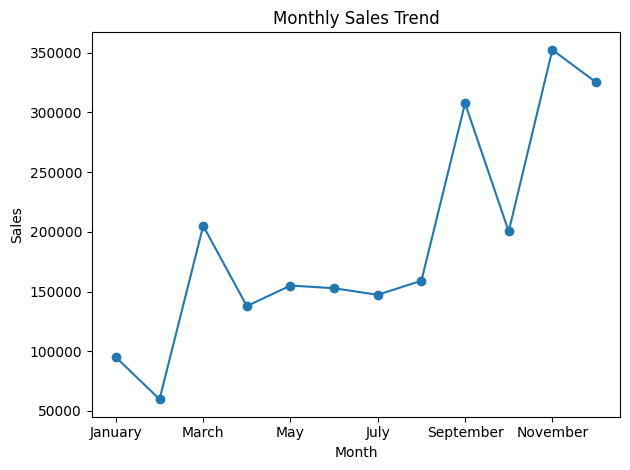

In [14]:
# Linte Char for Monthly Sales Trend 
plt.figure()
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

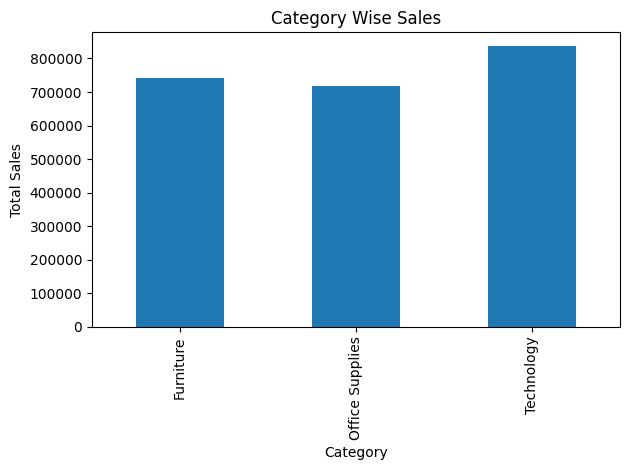

In [15]:
# Bar Chart for Category Wise Sales 
plt.figure()
category_sales.plot(kind="bar")
plt.title("Category Wise Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

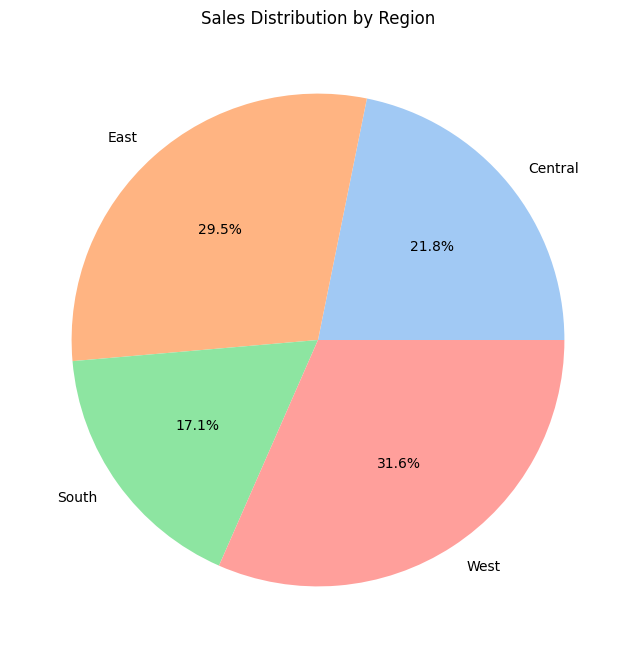

In [16]:
# Pie Chart for Sales by Region 
region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Sales Distribution by Region")
plt.show()

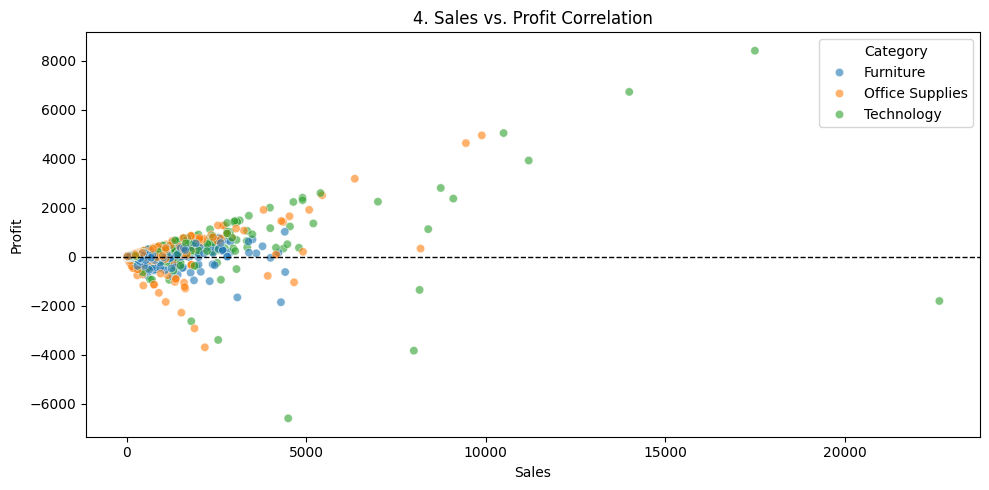

In [17]:
# Scatter Plot (Sales vs Profit) 
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.6)
plt.title("4. Sales vs. Profit Correlation")
plt.axhline(0, color='black', linestyle='--', linewidth=1) # Zero profit line
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()